## Find certain number

In [29]:
import numpy as np
from matplotlib import pyplot as plt

import qiskit
from qiskit import QuantumCircuit
from qiskit_textbook.tools import array_to_latex
from qiskit.tools.visualization import plot_histogram

vector = qiskit.Aer.get_backend('statevector_simulator') 
unitary = qiskit.Aer.get_backend('unitary_simulator') 
simulator = qiskit.Aer.get_backend("qasm_simulator")

def execute_circ(circ,backend,**kwargs):
    return qiskit.execute(circ,backend=backend,**kwargs).result()

In [39]:
item = 6

item_binary = [*map(int,np.binary_repr(item))]
n = len(item_binary) # or np.ceil(np.log2(item+1))
circ = QuantumCircuit(n,n)
circ.h(circ.qubits)

unitary = np.identity(2**n)
index_to_negate = sum([i*2**k for k,i in enumerate(item_binary)])
unitary[index_to_negate,index_to_negate] = -1
circ.unitary(unitary,circ.qubits)
circ.measure_all()

winner_state = np.eye(1,n,index_to_negate)

# array_to_latex(execute_circ(circ,simulator).get_counts())
# execute_circ(circ,simulator).get_counts(circ)

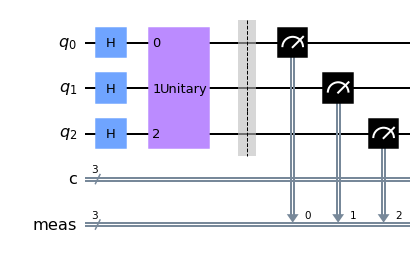

In [33]:
circ.draw('mpl')

## for $| 11 \rangle$

First get 1/2($\left|00\right\rangle$+$\left|01\right\rangle$+$\left|10\right\rangle$+$\left| 11 \right\rangle$)

In [ ]:
grover = QuantumCircuit(2,2)
grover.h([0,1])
grover.draw("mpl")

final_state = execute(grover,backend = vector).result() 
final_matrix = execute(grover,backend = unitary).result() 

array_to_latex(final_state.get_statevector(),pretext = "\\text{Statevector= }")
array_to_latex(final_matrix.get_unitary(),pretext = "\\text{Circuit= }")

Create oracle which is a controlled z gate. Dunno why we need to create a gate out of a circuit instead of using cz directly.

In [ ]:
oracle = QuantumCircuit(2,name="oracle")
oracle.cz(0,1)
oracle.to_gate()
oracle.draw("mpl");

final_state = execute(oracle,backend = vector).result() 
final_matrix = execute(oracle,backend = unitary).result() 

array_to_latex(final_state.get_statevector(),pretext = "\\text{Statevector= }")
array_to_latex(final_matrix.get_unitary(),pretext = "\\text{Circuit= }")

In [ ]:
grover.append(oracle,[0,1])
grover.draw("mpl");

In [ ]:
job = execute(grover,backend=vector)
result = job.result()

reflection around $|s'\rangle$ $\rightarrow$ $U_f$ $|s\rangle$

In [ ]:
sv = result.get_statevector()
np.around(sv,2)

reflection around $|s\rangle \rightarrow |s\rangle \langle s| + (|s\rangle \langle s|  - \mathbb1)$